<a href="https://colab.research.google.com/github/MaxZx3000/Forest-Fire/blob/main/Final_Project_Forest_Fire_Classifier_(Anthony_Kevin_Oktavius)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Forest Fire Classifier

Dibuat oleh: Anthony Kevin Oktavius

Library Import

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adamax
from keras import backend as K

from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTENC
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Data Loading

Mengunduh dataset forestfire.csv dari UCI Machine Learning Repository

In [ ]:
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

forest_fire_df = pd.read_csv(dataset_url)
forest_fire_df

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

Melihat info singkat pada dataset.

In [ ]:
forest_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Melihat nilai statistika pada dataset forest fire.

In [ ]:
forest_fire_df.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

Melakukan listing field-field pada dataset forest fire.


In [ ]:
x_field = "X"
y_field = "Y"
month_field = "month"
day_field = "day"
ffmc_field = "FFMC"
dmc_field = "DMC"
dc_field = "DC"
isi_field = "ISI"
temp_field = "temp"
rh_field = "RH"
wind_field = "wind"
rain_field = "rain"
area_field = "area"

Mendefinisikan field numerikal dan kategorikal pada dataset forest fire.

In [ ]:
categorical_variables = [x_field, y_field, month_field, day_field]
numerical_variables = [ffmc_field, dmc_field, dc_field, isi_field,
                       temp_field, rh_field, wind_field, rain_field, area_field]

Mendefinisikan field-field target dan features.

In [ ]:
features = list(forest_fire_df.columns)
features.remove(area_field)
# features.remove(month_field)
# features.remove(day_field)
# features.remove(rain_field)
# features.remove(x_field)
# features.remove(y_field)

target = area_field

## Data Visualization

### Single Variable

Bar Plot - Comparison

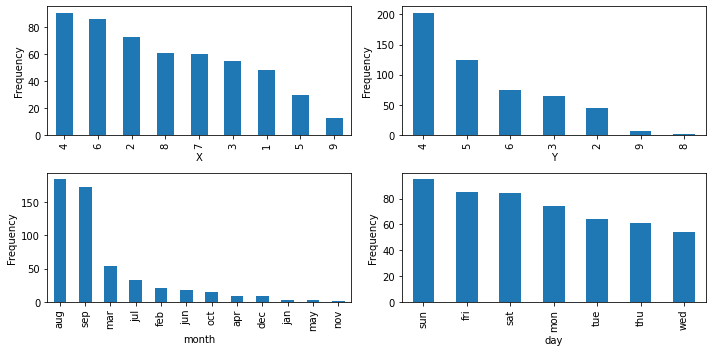

In [ ]:
bar_plot_fields = categorical_variables.copy()

figure, axes = plt.subplots(2, 2, figsize = (10, 5))
axes = axes.flatten()


for index, field in enumerate(bar_plot_fields):
  forest_fire_df[field].value_counts().plot(kind = 'bar', 
                                            ax = axes[index],
                                            xlabel = field,
                                            ylabel = "Frequency")

plt.tight_layout()
plt.show()

Dist plot - Distribution

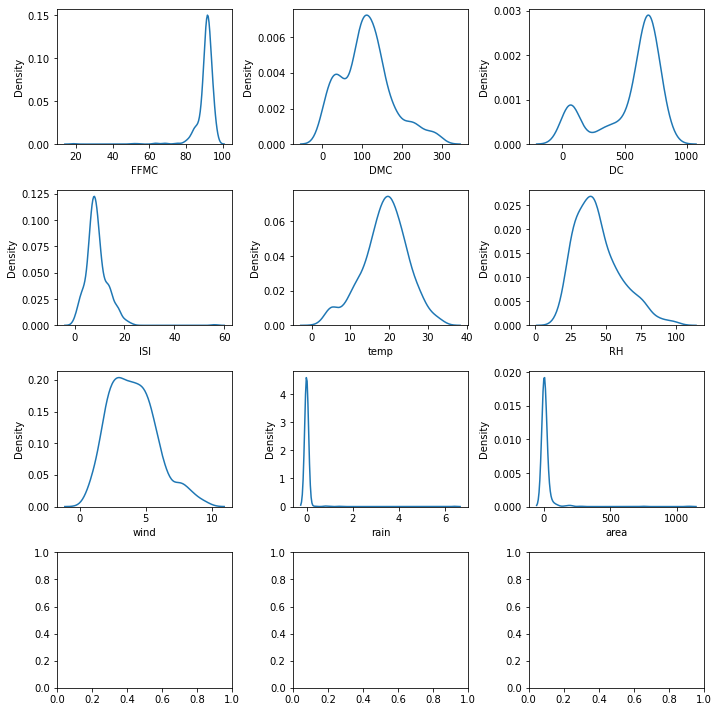

In [ ]:
dist_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(dist_plot_fields):
  sns.kdeplot(forest_fire_df[field], ax = axes[index])

plt.tight_layout()
plt.show()

Box Plot - Distribution & Comparison & Outlier Detection

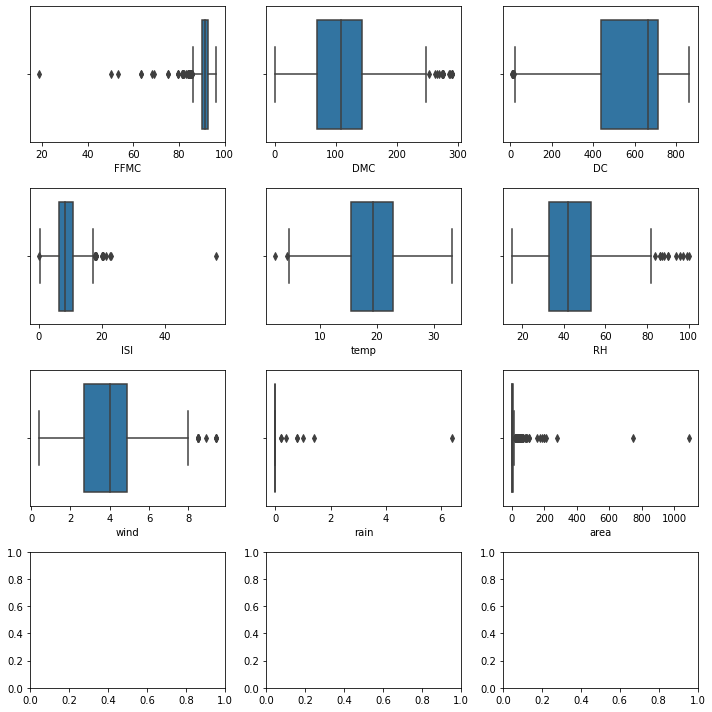

In [ ]:
box_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(box_plot_fields):
  sns.boxplot(data = forest_fire_df, x = field, ax = axes[index])

plt.tight_layout()
plt.show()

### Two Variables

Mean Bar Plot - Comparison

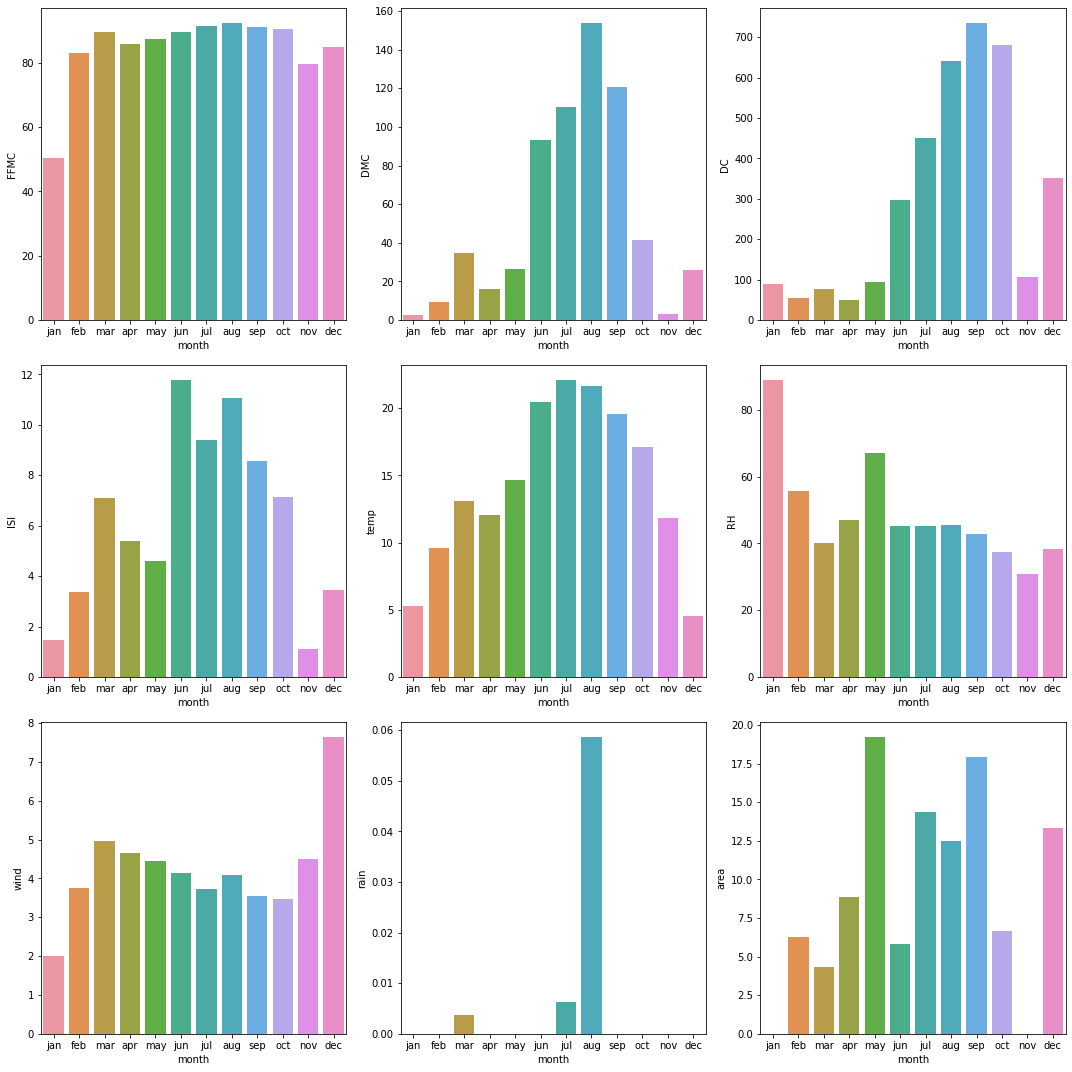

In [ ]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
axes = axes.flatten()

mean_bar_plot_fields = numerical_variables.copy()

for index, field in enumerate(mean_bar_plot_fields):
  sns.barplot(data = forest_fire_df, 
              x = month_field, 
              y = field,
              ax = axes[index],
              ci = None,
              order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep",
                      "oct", "nov", "dec"])
  
plt.tight_layout()

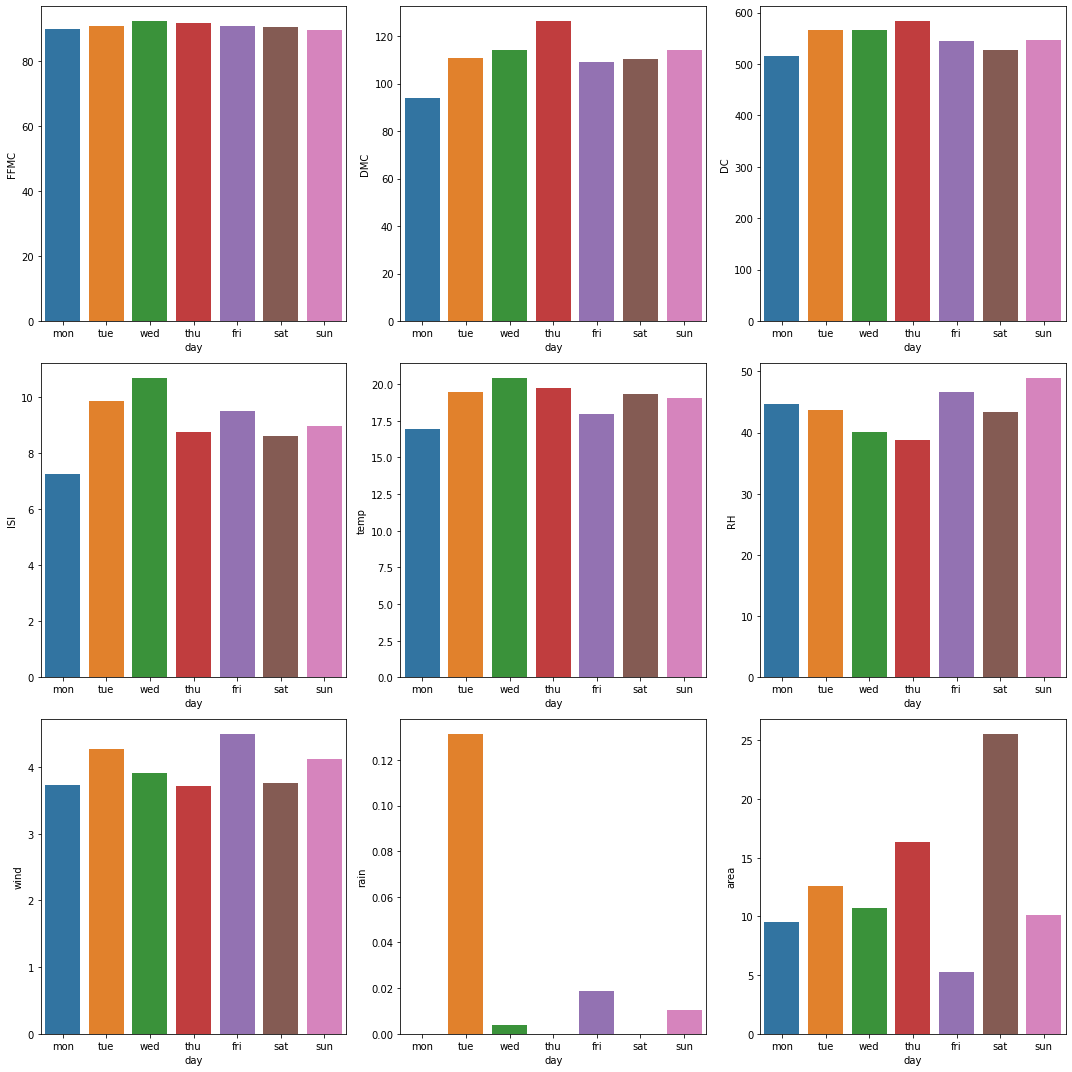

In [ ]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
axes = axes.flatten()

mean_bar_plot_fields = numerical_variables.copy()

for index, field in enumerate(mean_bar_plot_fields):
  sns.barplot(data = forest_fire_df, 
              x = day_field, 
              y = field,
              ax = axes[index],
              ci = None,
              order = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
  
plt.tight_layout()

Multiple Bar Chart - Composition & Comparison

In [ ]:
def make_multiple_bar_plot(df, x1, x2, y, cmap, ax, statistic, order):
  target_field_two_categorical_df = df.groupby([x1, x2]).mean()[y]

  mean_target_field_two_categorical_df = target_field_two_categorical_df.unstack(
      level = 1
  )

  mean_target_field_two_categorical_df = mean_target_field_two_categorical_df.reset_index()

  mean_target_field_two_categorical_df = pd.melt(
      mean_target_field_two_categorical_df,
      id_vars = x1,
      var_name = x2,
      value_name = y
  )
  
  sns.barplot(x = x1,
              y = y,
              hue = x2,
              data = forest_fire_df,
              ax = ax,
              ci = None,
              order = order)

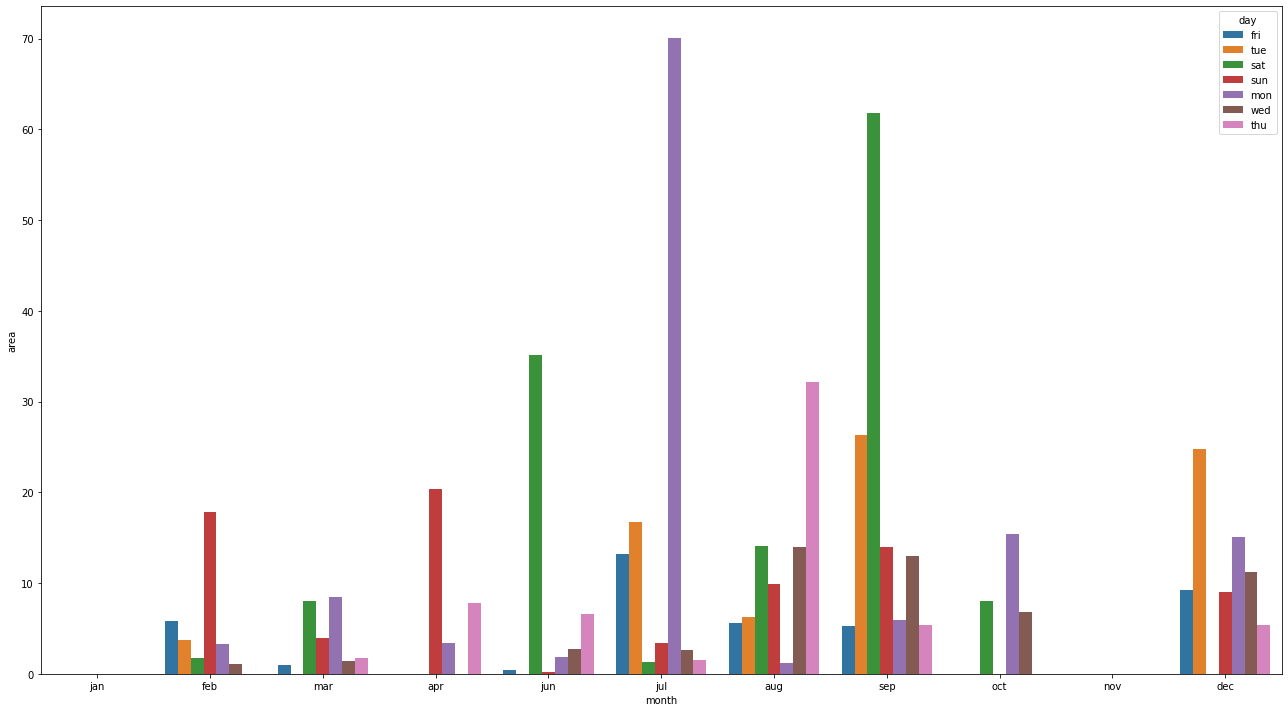

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

fig.set_figwidth(18)
fig.set_figheight(10)

multiple_bar_fields = categorical_variables.copy()
multiple_bar_fields.append(area_field)
    
make_multiple_bar_plot(forest_fire_df, 
                        x1 = month_field, 
                        x2 = day_field,
                        y = area_field, 
                        cmap = 'inferno',
                        ax = ax,
                        statistic = 'mean',
                        order =  ["jan", "feb", "mar", "apr", "jun", "jul", "aug", "sep",
                       "oct", "nov", "dec"])
  
plt.tight_layout()
plt.show()

### Multiple Variables

Correlation Plot - Correlation

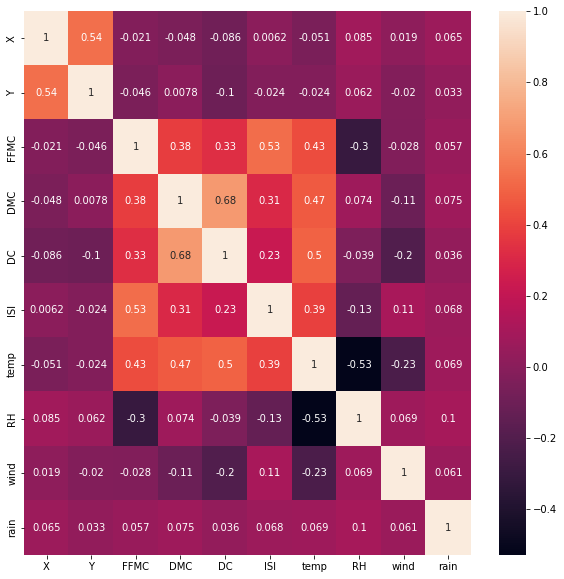

In [ ]:
corr_plot_fields = features.copy()

plt.figure(figsize = (10, 10))
sns.heatmap(
    forest_fire_df[corr_plot_fields].corr(),
    annot = True,
)
plt.show()

Pairplot - Distribution & Comparison & Correlation

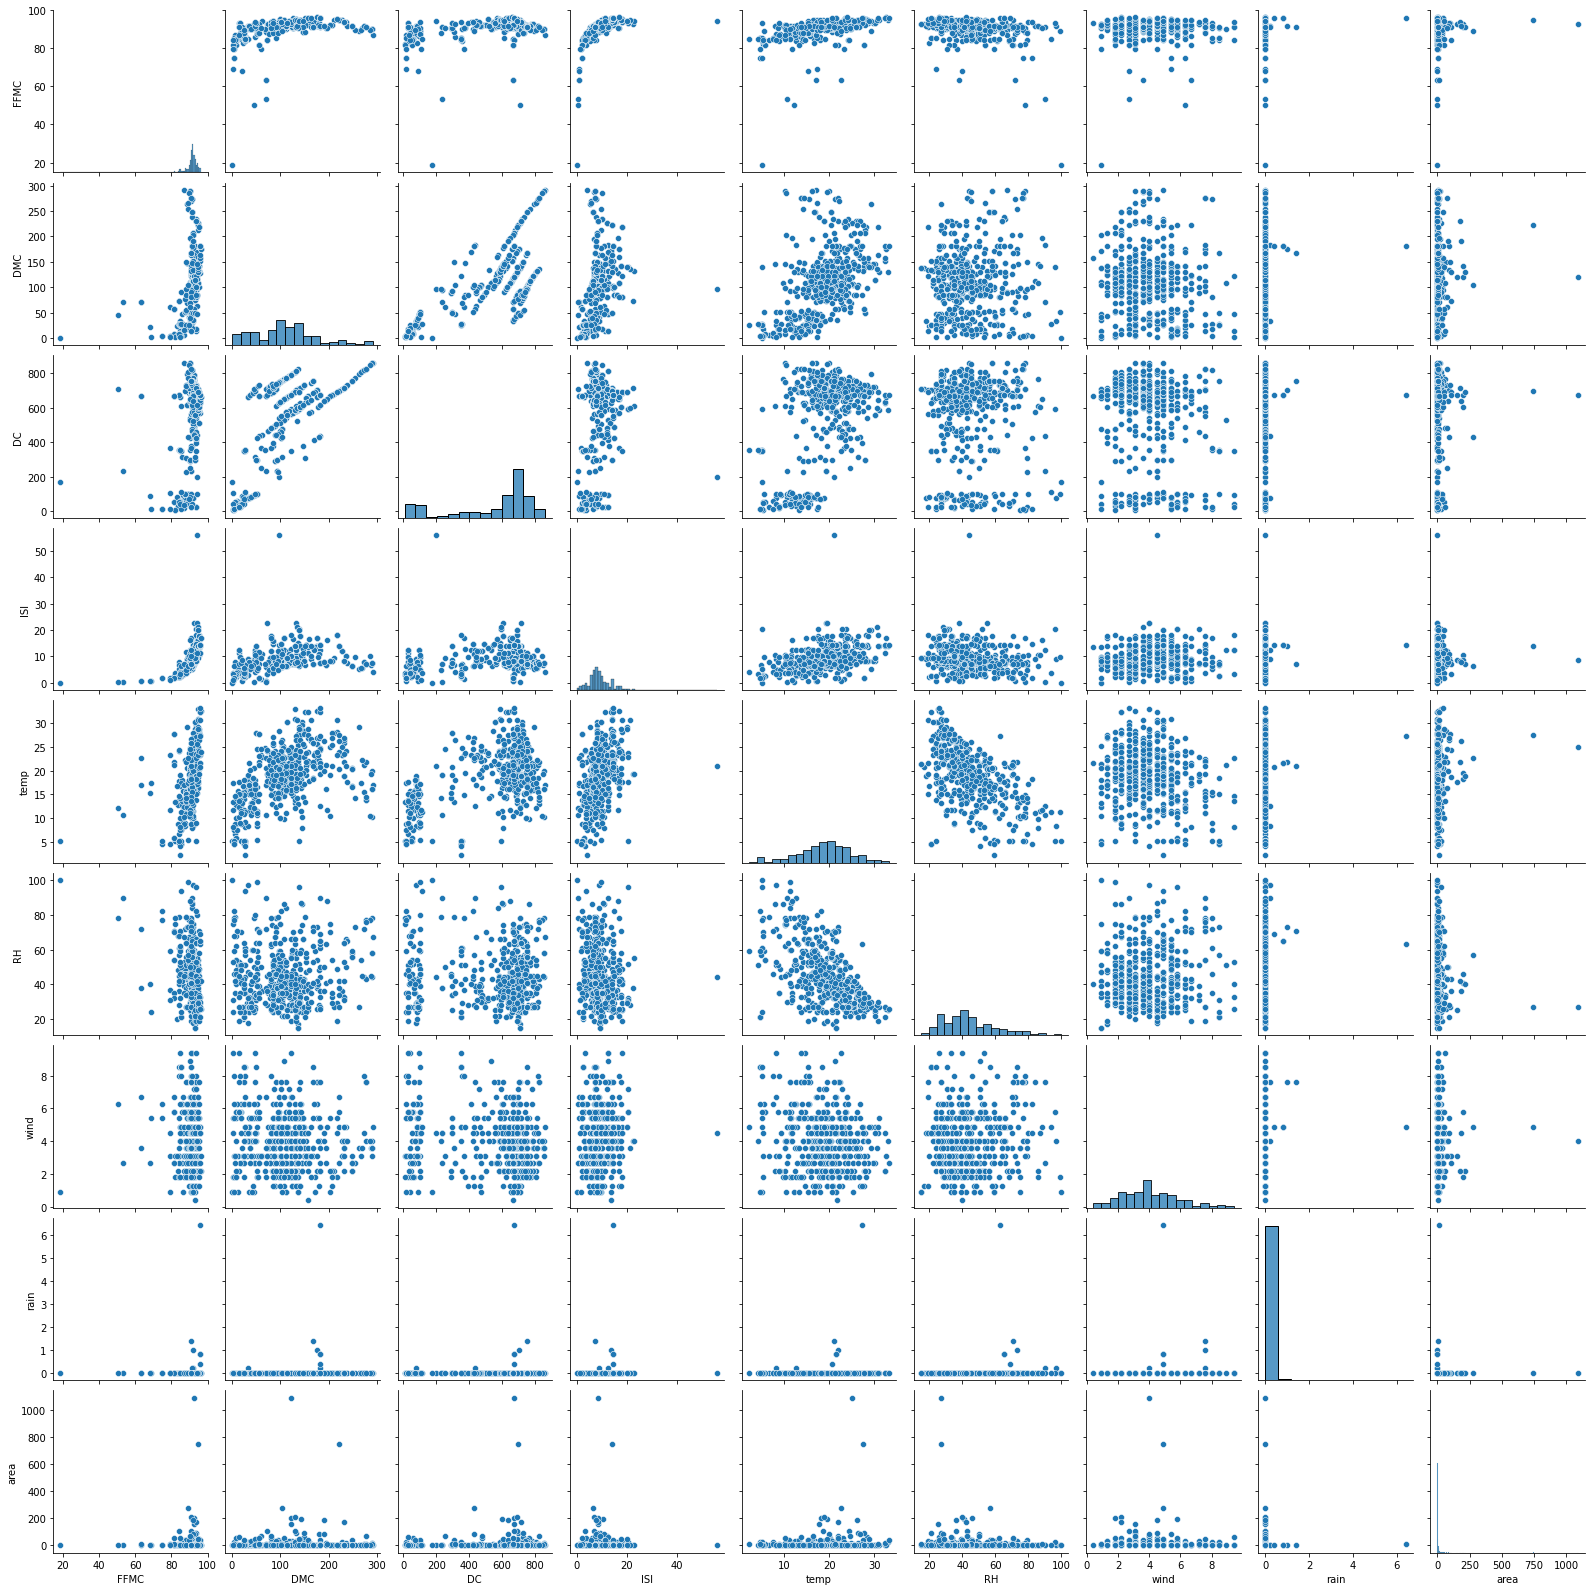

In [ ]:
pairplot_fields = numerical_variables.copy()

sns.pairplot(
    data = forest_fire_df[pairplot_fields],
)

## Data Preprocessing

### Konversi Bulan dan Hari menjadi Angka

In [ ]:
months = {
    'jan': 1, 
    'nov': 2,
    'mar': 3,
    'jun': 4,
    'oct': 5,
    'feb': 6,
    'apr': 7,
    'aug': 8,
    'dec': 9,
    'jul': 10,
    'sep': 11,
    'may': 12,
}

days = {
    'fri': 1,
    'mon': 2,
    'sun': 3,
    'wed': 4,
    'tue': 5,
    'thu': 6,
    'sat': 7,
}

In [ ]:
month_day_converted_forest_fire_df = forest_fire_df.copy()
month_day_converted_forest_fire_df[month_field] = month_day_converted_forest_fire_df[month_field].replace(months)
month_day_converted_forest_fire_df[day_field] = month_day_converted_forest_fire_df[day_field].replace(days)

In [ ]:
month_day_converted_forest_fire_df

X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      3    1  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4      5    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4      5    7  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      3    1  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      3    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      8    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      8    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      8    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      8    7  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3      2    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


### Area Feature Transformation dengan logarithm transformation.



In [ ]:
log_transform_forest_fire_df = month_day_converted_forest_fire_df.copy()
log_transform_forest_fire_df[area_field] = np.log1p(log_transform_forest_fire_df[area_field])

### Feature Selection dengan Random Forest

In [ ]:
random_forest = RandomForestRegressor(random_state = 100)
random_forest = random_forest.fit(
    log_transform_forest_fire_df[features],
    log_transform_forest_fire_df[target],
)

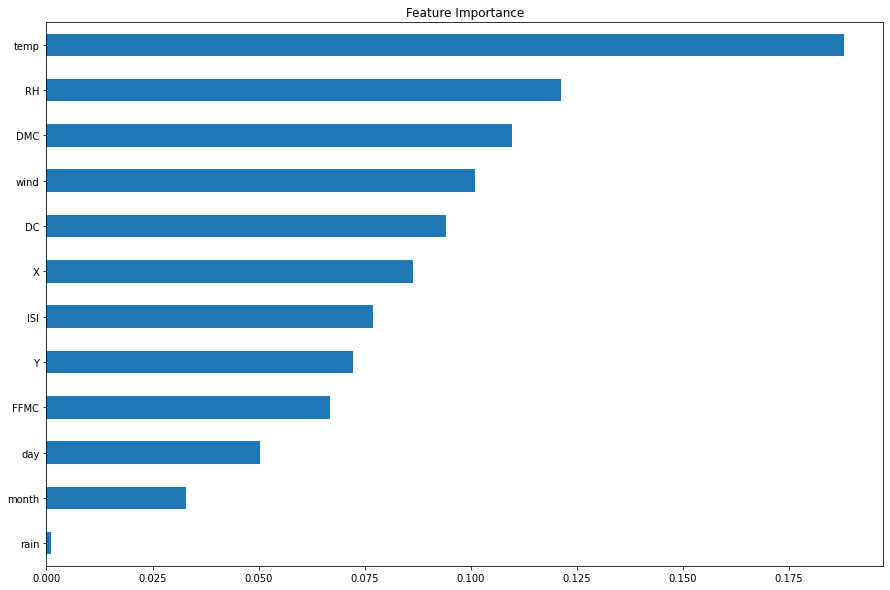

In [ ]:
X_ = np.array(features)
importance_scores = random_forest.feature_importances_

plt.figure(figsize=(15, 10))
plt.title('Feature Importance')

feature_importances = pd.Series(random_forest.feature_importances_, index = X_)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')

plt.show()

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    log_transform_forest_fire_df[features],
    log_transform_forest_fire_df[target],
    test_size = 0.13
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(449, 12)
(68, 12)
(449,)
(68,)


### MinMaxScaler

In [ ]:
min_max_fields = features.copy()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

y_train_scaled = pd.DataFrame(y_train.copy(), columns = [area_field])
y_test_scaled = pd.DataFrame(y_test.copy(), columns = [area_field])

min_max_scaler = MinMaxScaler()
x_train_scaled[min_max_fields] = min_max_scaler.fit_transform(x_train[min_max_fields])
x_test_scaled[min_max_fields] = min_max_scaler.transform(x_test[min_max_fields])

min_max_scaler = MinMaxScaler()
y_train_scaled[area_field] = min_max_scaler.fit_transform(y_train_scaled[[area_field]])
y_test_scaled[area_field] = min_max_scaler.transform(y_test_scaled[[area_field]])

### Post Data Visualization

#### Single Variable

In [ ]:
def single_plot_template(df, fields, plot_type, title, nrows, ncols, figsize = (15, 15)):
  figure, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
  figure.suptitle(title)
  figure.subplots_adjust(top=0.96)

  axes = axes.flatten()
  for index, field in enumerate(fields):
    single_plot_function = eval(plot_type)
    single_plot_function(data = df, x = field, ax = axes[index])

  plt.tight_layout()
  plt.show()

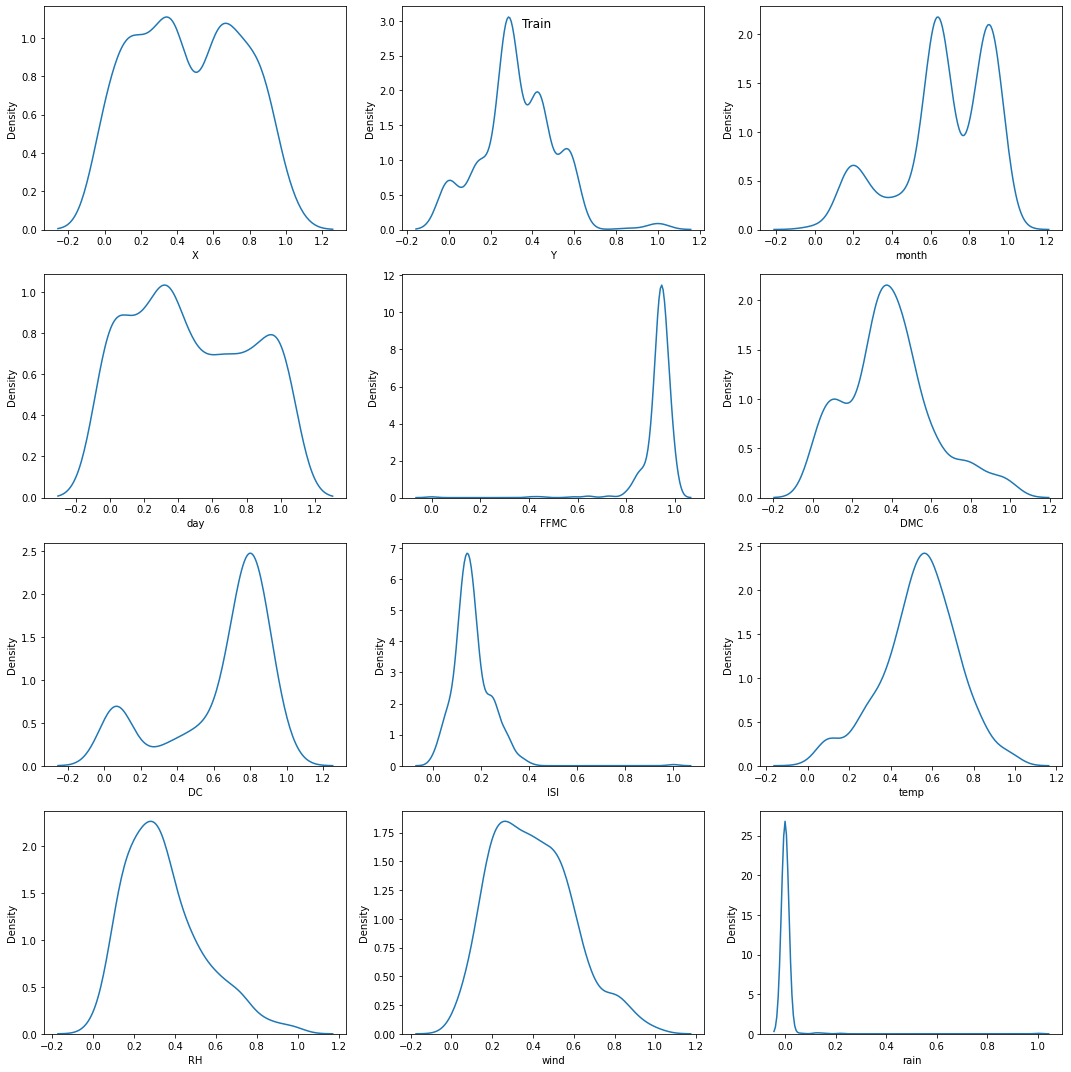

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


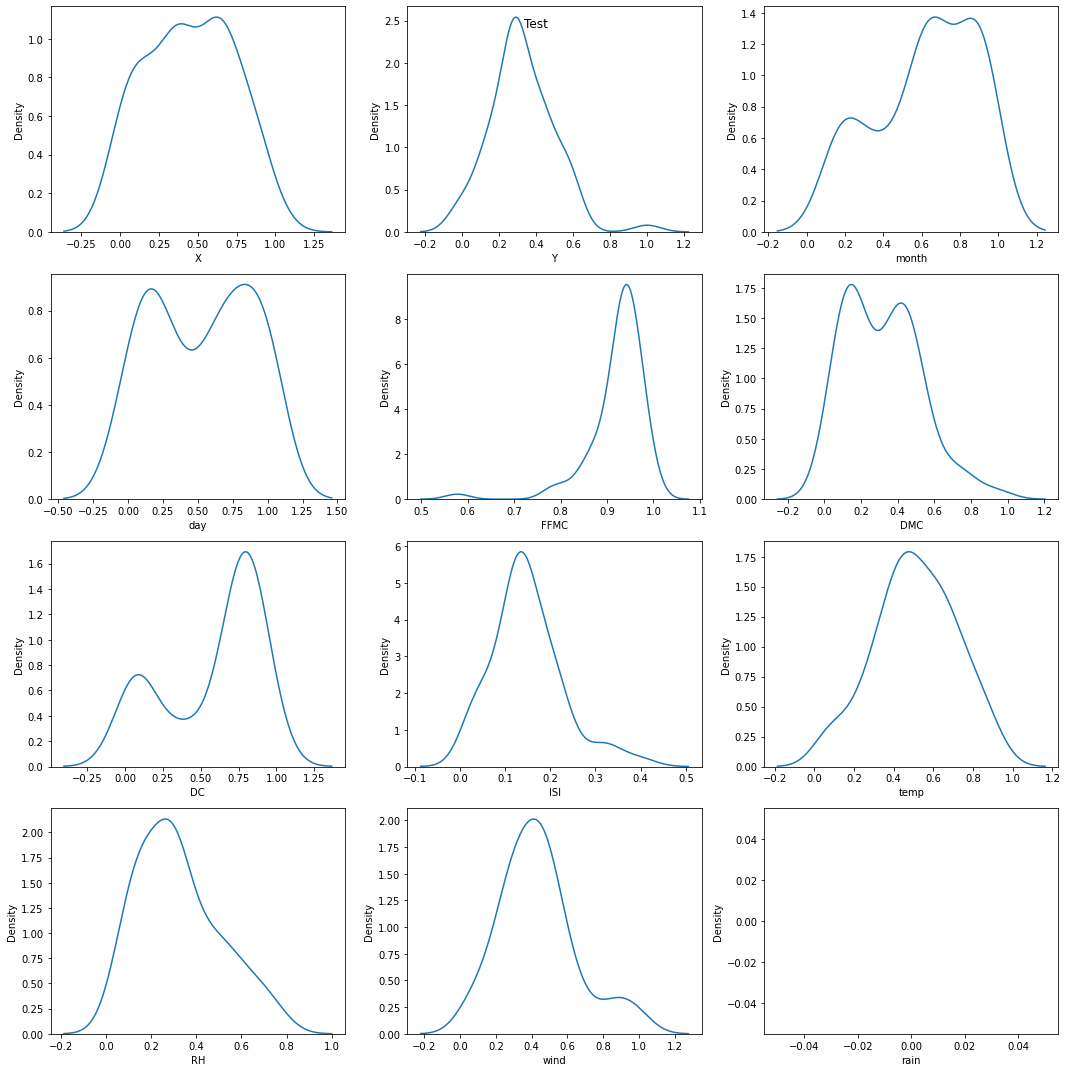

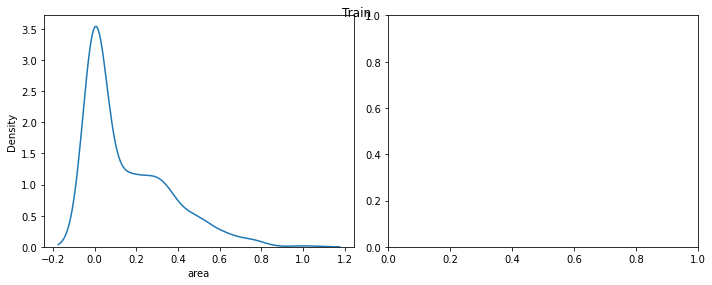

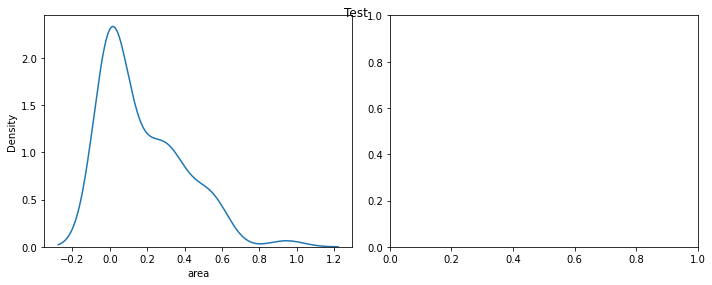

In [ ]:
post_data_kde_fields = features.copy()

single_plot_template(df = x_train_scaled, 
                     fields = post_data_kde_fields, 
                     plot_type = "sns.kdeplot",
                     title = "Train",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = x_test_scaled, 
                     fields = post_data_kde_fields, 
                     plot_type = "sns.kdeplot",
                     title = "Test",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = y_train_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.kdeplot",
                     title = "Train",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

single_plot_template(df = y_test_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.kdeplot",
                     title = "Test",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

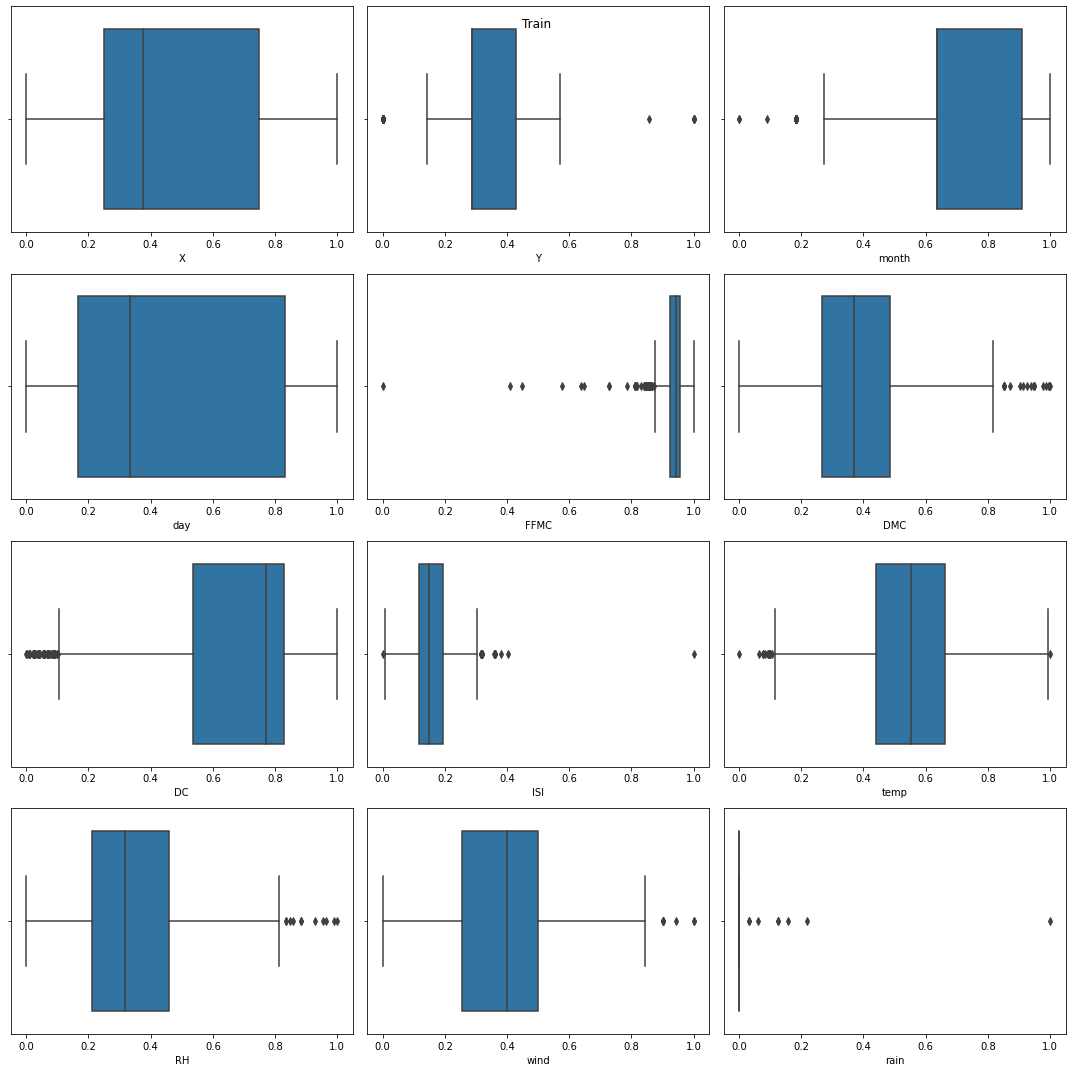

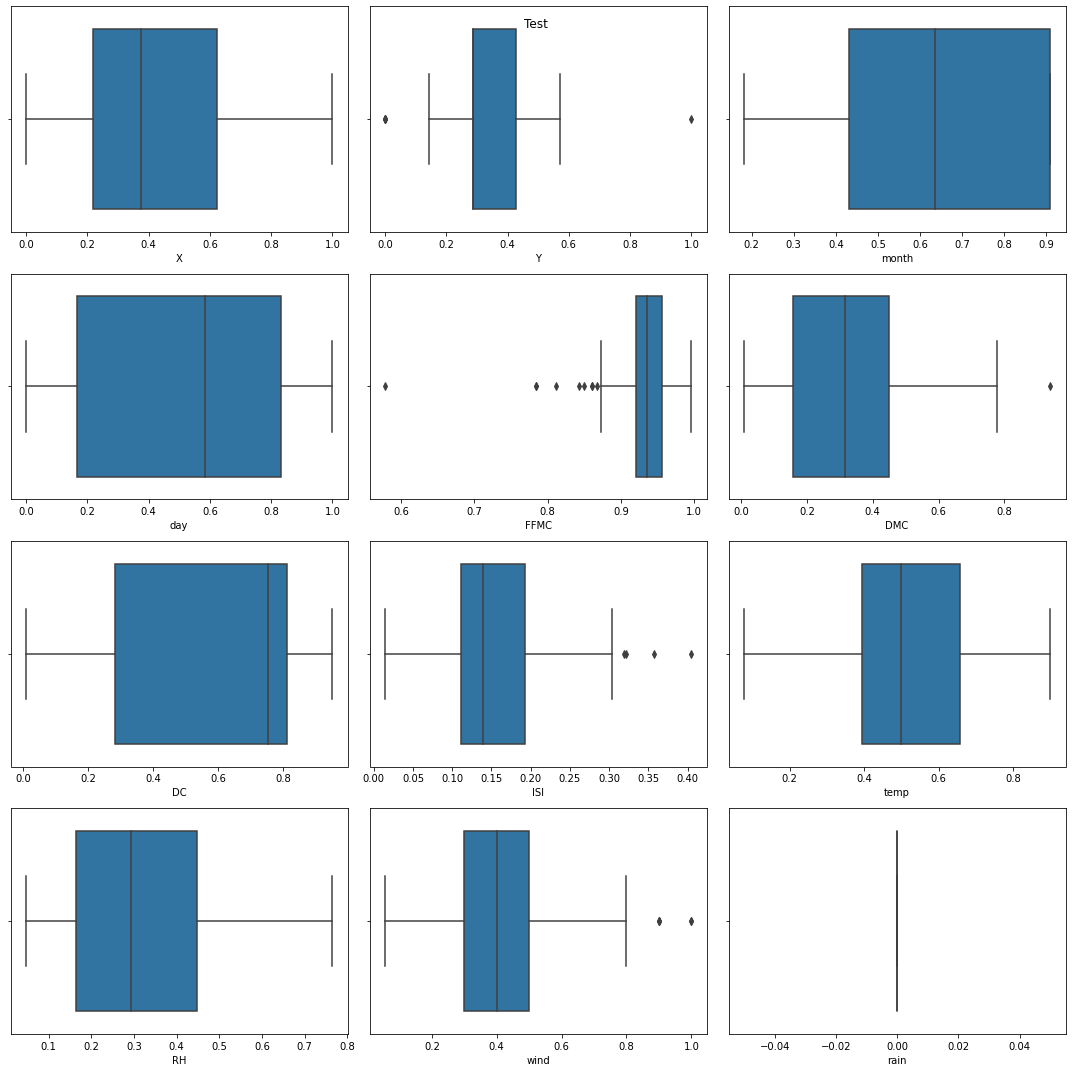

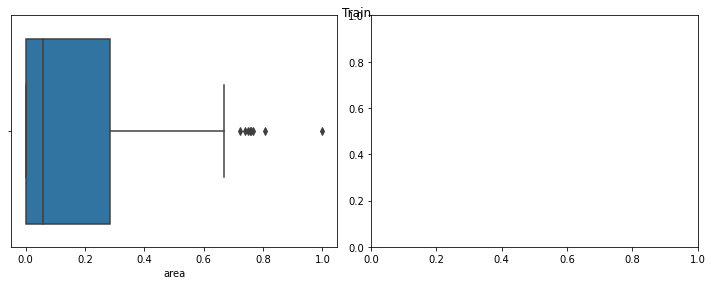

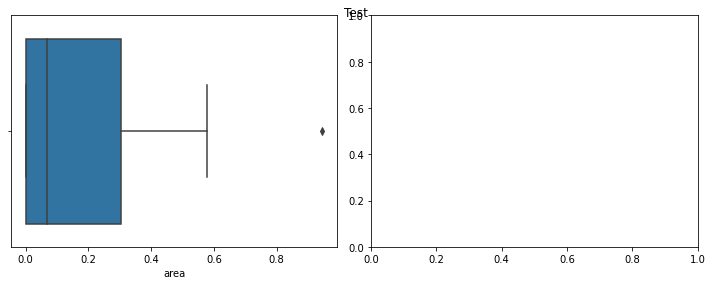

In [ ]:
post_data_box_fields = features.copy()

single_plot_template(df = x_train_scaled, 
                     fields = post_data_box_fields, 
                     plot_type = "sns.boxplot",
                     title = "Train",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = x_test_scaled, 
                     fields = post_data_box_fields, 
                     plot_type = "sns.boxplot",
                     title = "Test",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = y_train_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.boxplot",
                     title = "Train",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

single_plot_template(df = y_test_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.boxplot",
                     title = "Test",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

#### Mutliple Variables

In [ ]:
def multiple_fields_plot_template(df, suptitle, plot_type):

  plot_function = eval(plot_type)
  try:
    plot_function(data = df, annot = True)
  except:
    plot_function(data = df)
    
  plt.suptitle(suptitle)
  plt.show()
  plt.tight_layout()

In [ ]:
forest_fire_multiple_plots_df_train = pd.concat([x_train_scaled, y_train_scaled], axis = 1)
forest_fire_multiple_plots_df_test = pd.concat([x_test_scaled, y_test_scaled], axis = 1)

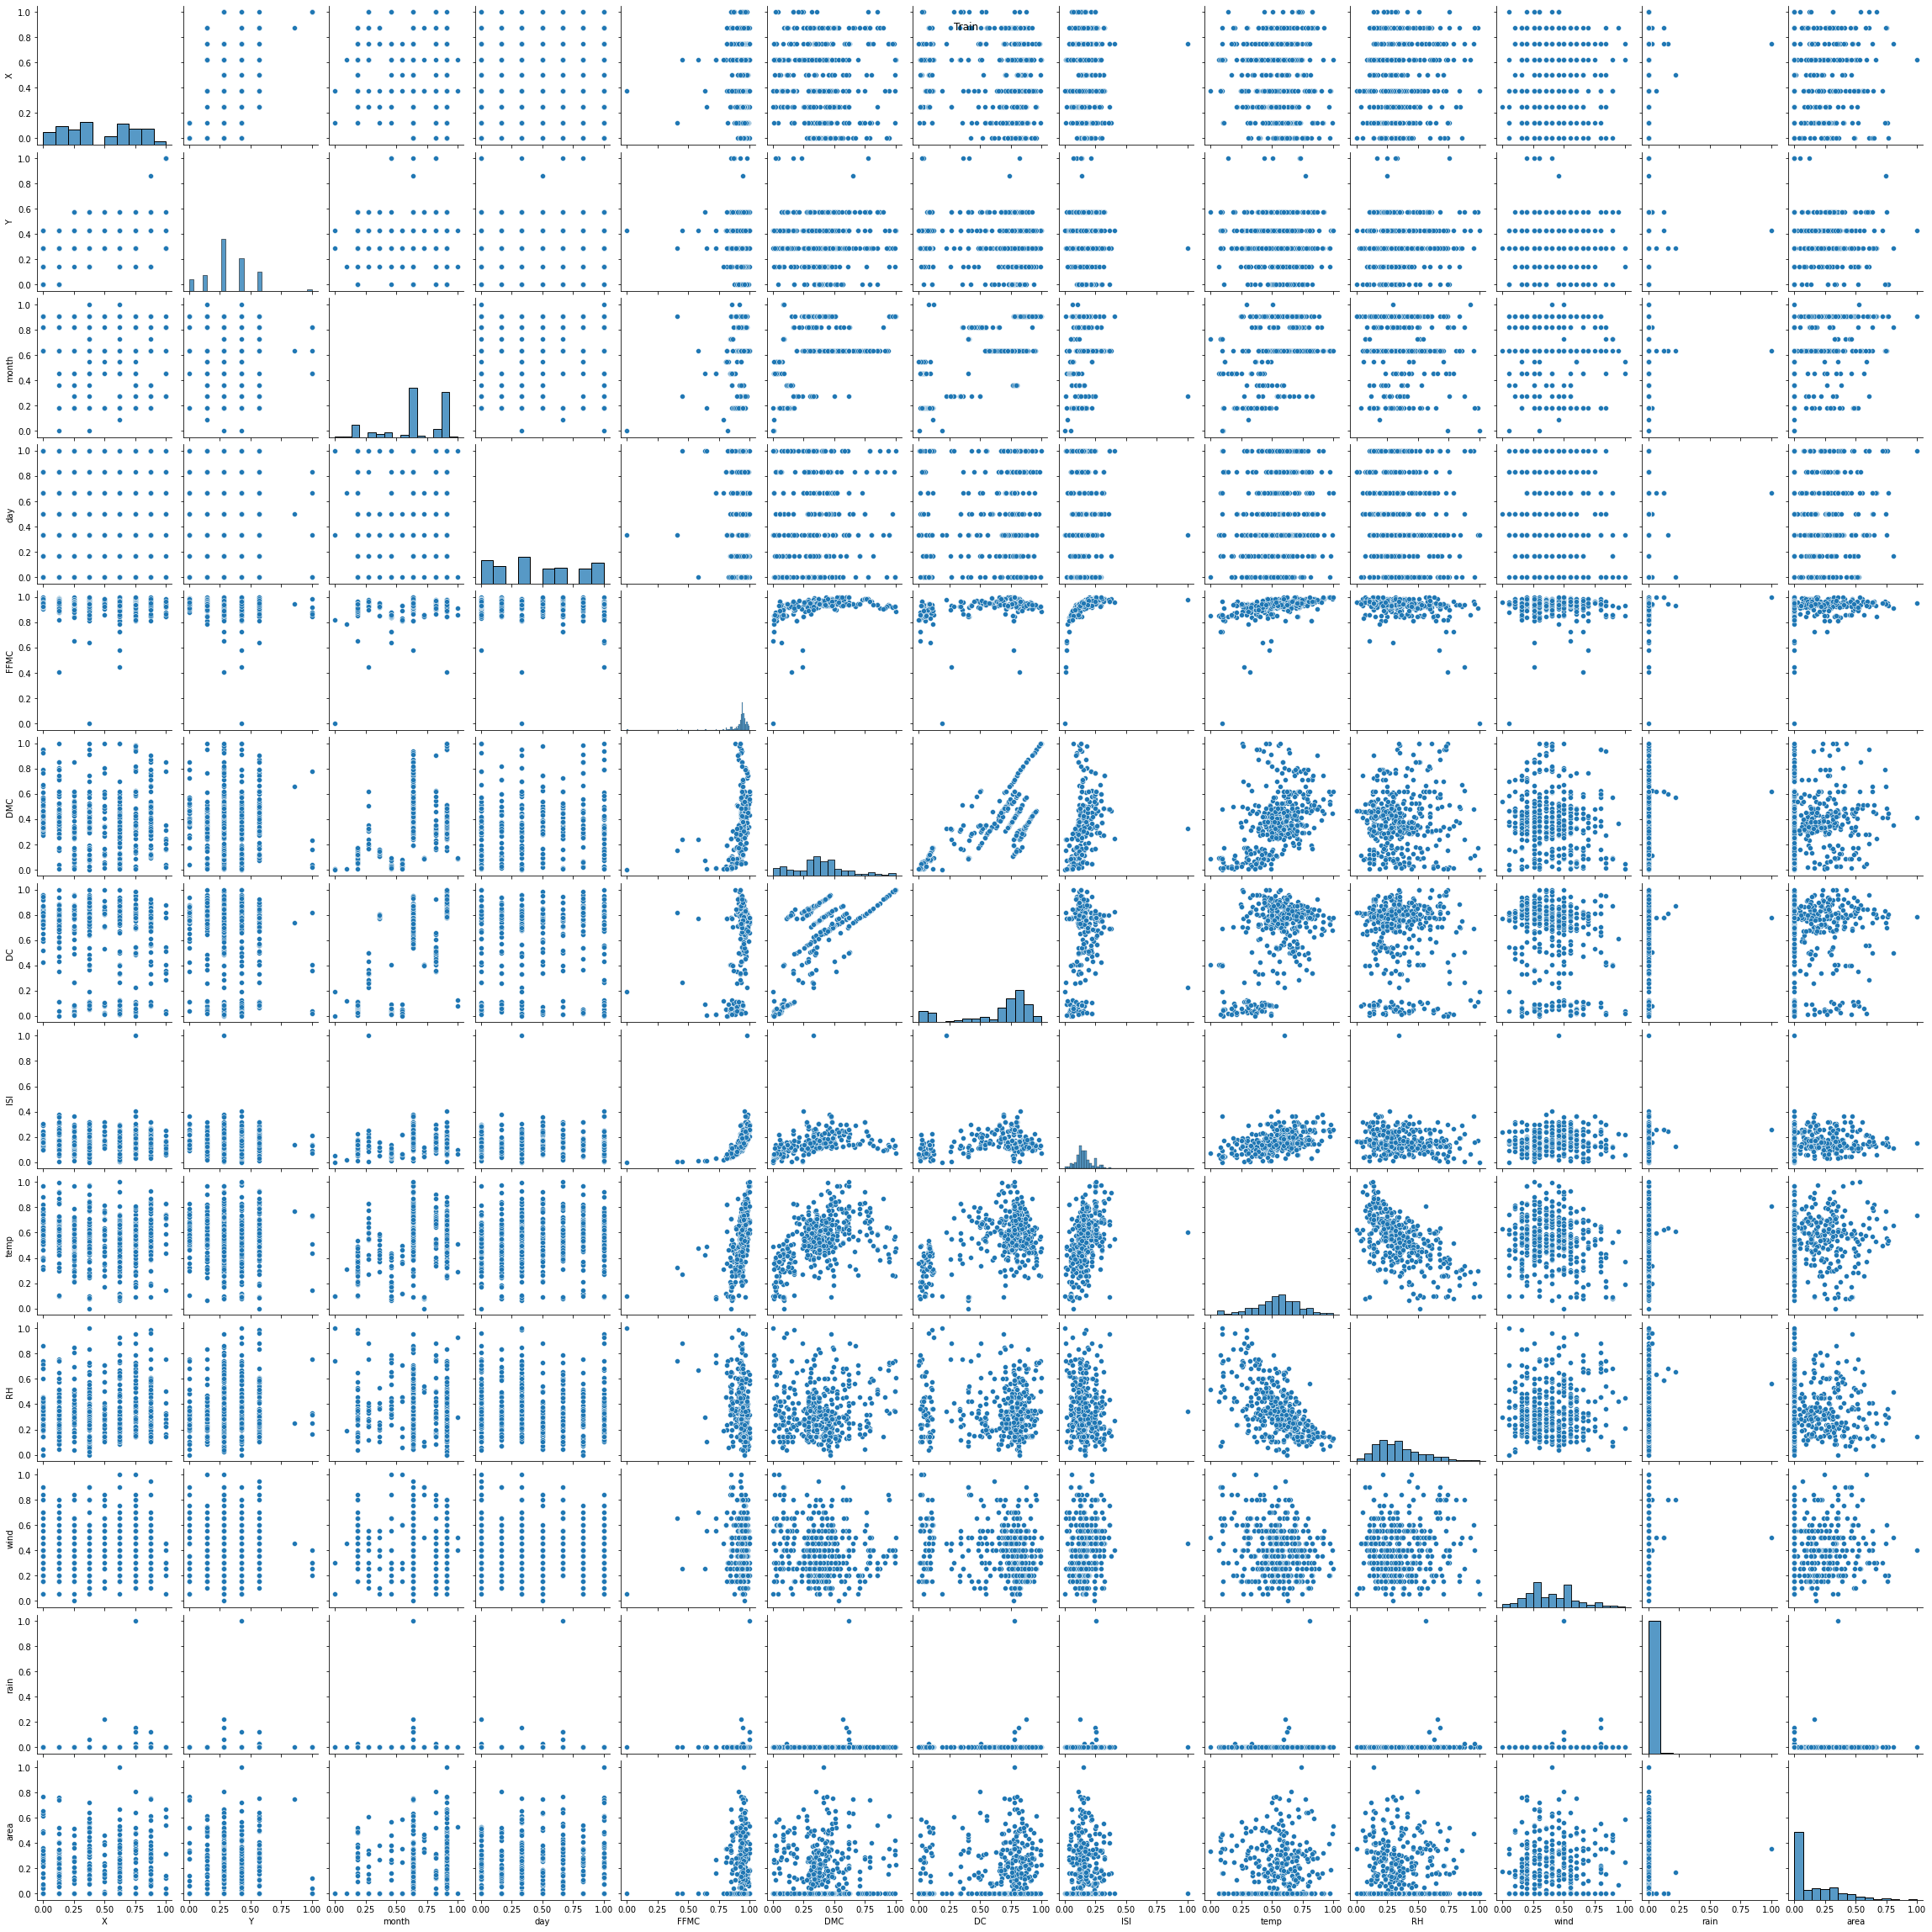

<Figure size 432x288 with 0 Axes>

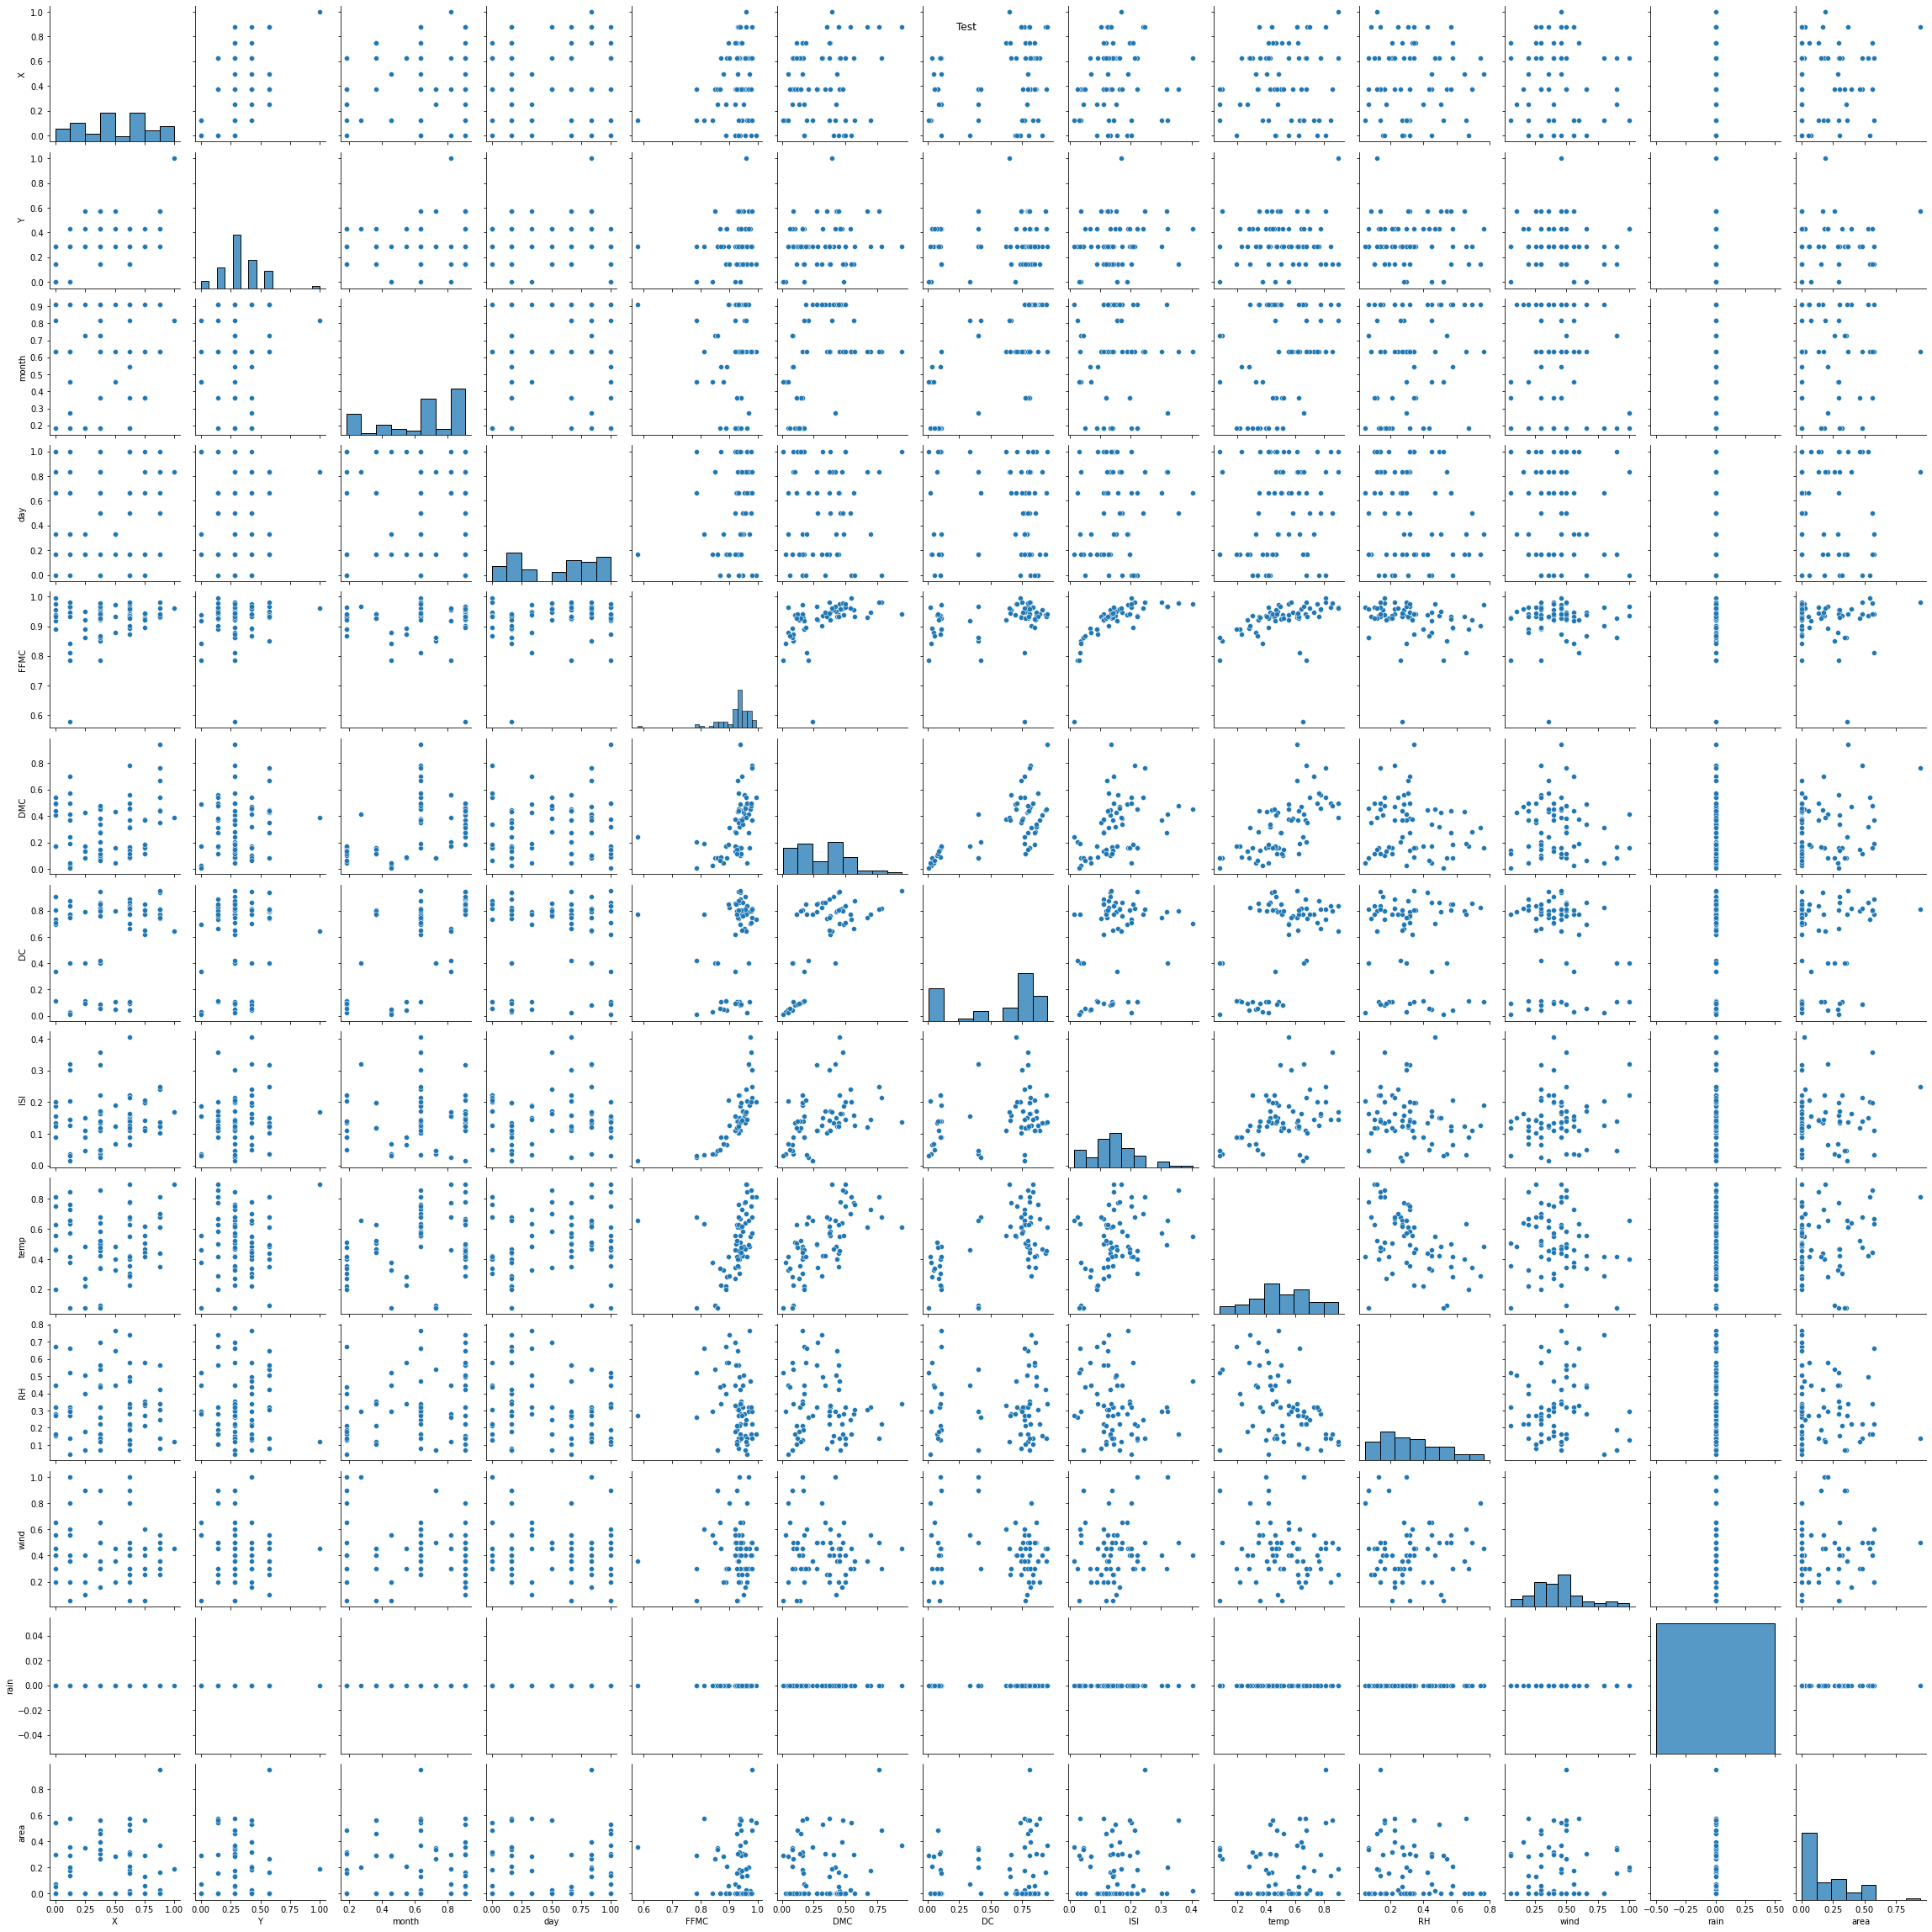

<Figure size 432x288 with 0 Axes>

In [ ]:
pairplot_fields = features.copy()

multiple_fields_plot_template(forest_fire_multiple_plots_df_train, 
                              "Train", 
                              "sns.pairplot")

multiple_fields_plot_template(forest_fire_multiple_plots_df_test, 
                              "Test", 
                              "sns.pairplot")

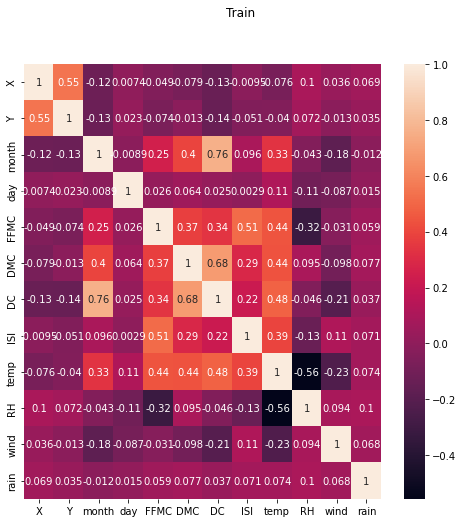

<Figure size 432x288 with 0 Axes>

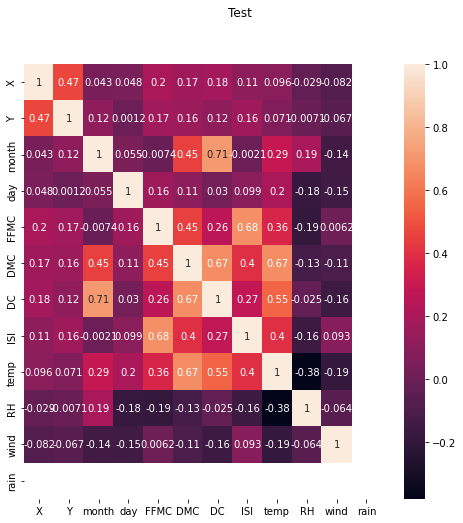

<Figure size 432x288 with 0 Axes>

In [ ]:
heatmap_fields = features.copy()

plt.figure(figsize = (8, 8))
multiple_fields_plot_template(forest_fire_multiple_plots_df_train[heatmap_fields].corr(), 
                              "Train", 
                              "sns.heatmap")

plt.figure(figsize = (8, 8))
multiple_fields_plot_template(forest_fire_multiple_plots_df_test[heatmap_fields].corr(), 
                              "Test", 
                              "sns.heatmap")

## Modelling

Inisialisasi variabel global untuk modelling

In [ ]:
NUMBER_OF_DATASET_ROWS = x_train_scaled.shape[0]
X_TRAIN_DF = x_train_scaled.copy()
X_TEST_DF = x_test_scaled.copy()
Y_TRAIN_DF = y_train.copy()
Y_TEST_DF = y_test.copy()

Inisialisasi Model

In [ ]:
def initialize_model_small_layers():
  # Model dengan layer berjumlah sedikit
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(6, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

def initialize_model_medium_layers():
  # Model dengan layer berjumlah sedang
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(3, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(6, activation = "relu"))
  model.add(Dense(6, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

def initialize_model_large_layers():
  # Model dengan layer berjumlah banyak
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(6, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(16, activation = "relu"))
  model.add(Dense(32, activation = "relu"))
  model.add(Dense(16, activation = "relu"))
  model.add(Dense(8, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

In [ ]:
def plot_deep_learning_metrics(history, metric, val_metric, title):
  plt.plot(history.history[metric])
  plt.plot(history.history[val_metric])
  plt.title(title)
  plt.ylabel("Value")
  plt.xlabel("Epochs")
  plt.legend([metric, val_metric], loc="upper right")

Menambahkan Early Stopping dan Model Checkpoint

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

### Eksperimen ke-1: Komparasi Jumlah Layer dengan karakteristik sebagai berikut.

* **Batch Size**: Disesuaikan dengan jumlah data
* **Epoch Size**: 100
* **Loss Function**: mean_squared_error
* **Learning Rate**: 0.0001
* **Jumlah Layer**: sedang

In [ ]:
model_layers = ["initialize_model_small_layers", 
                "initialize_model_medium_layers", 
                "initialize_model_large_layers"]

In [ ]:
histories = []

for index, model_layer in enumerate(model_layers):
  model = eval(model_layer)
  model = model()

  model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 100,
      callbacks = [early_stopping, model_checkpoint],
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 2.9694 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 474ms/step - loss: 2.9694 - accuracy: 0.4833 - val_loss: 3.5528 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 2.9674 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 34ms/step - loss: 2.9674 - accuracy: 0.4833 - val_loss: 3.5500 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 2.9653 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 33ms/step - loss: 2.9653 - accuracy: 0.4833 - val_loss: 3.5472 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 2.9632 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 34ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 2.6840 - accuracy: 0.4076
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 532ms/step - loss: 2.6840 - accuracy: 0.4076 - val_loss: 3.3282 - val_accuracy: 0.3971
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 2.6821 - accuracy: 0.4076
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 32ms/step - loss: 2.6821 - accuracy: 0.4076 - val_loss: 3.3261 - val_accuracy: 0.3971
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 2.6803 - accuracy: 0.4053
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 40ms/step - loss: 2.6803 - accuracy: 0.4053 - val_loss: 3.3241 - val_accuracy: 0.3971
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 2.6784 - accuracy: 0.4031
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 34ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.1020 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 643ms/step - loss: 3.1020 - accuracy: 0.4833 - val_loss: 3.7230 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.1015 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 36ms/step - loss: 3.1015 - accuracy: 0.4833 - val_loss: 3.7226 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.1009 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 31ms/step - loss: 3.1009 - accuracy: 0.4833 - val_loss: 3.7221 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.1003 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 44ms/step

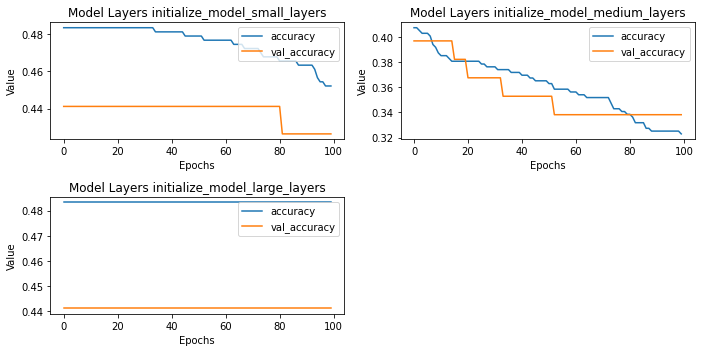

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(2, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Model Layers {model_layers[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-2: Komparasi Learning Rate dengan karakteristik sebagai berikut.

* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Loss Function**: mean_squared_error
* **Learning Rate**: 0.0001
* **Jumlah layer**: sedang

In [ ]:
learning_rates = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

In [ ]:
histories = []

for index, learning_rate in enumerate(learning_rates):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = Adam(learning_rate = learning_rate),
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 100,
      callbacks = [early_stopping, model_checkpoint],
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 3.1013 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 2s 2s/step - loss: 3.1013 - accuracy: 0.4833 - val_loss: 3.7189 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.0988 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 84ms/step - loss: 3.0988 - accuracy: 0.4833 - val_loss: 3.7160 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.0962 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 115ms/step - loss: 3.0962 - accuracy: 0.4833 - val_loss: 3.7130 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.0936 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s

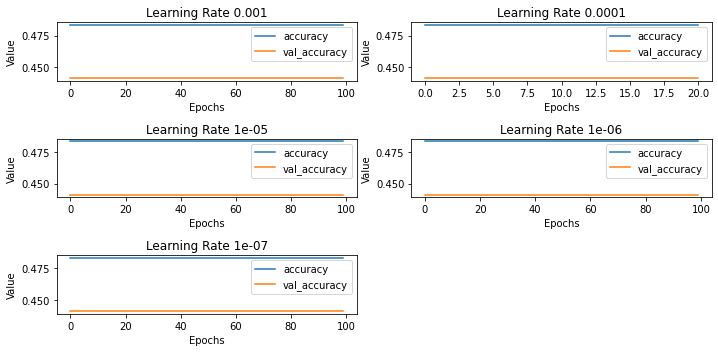

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Learning Rate {learning_rates[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-3: Komparasi Optimizers dengan karakteristik sebagai berikut.

* **Batch Size**: Disesuaikan dengan jumlah data
* **Epoch Size**: 100
* **Loss Function**: mean_squared_error
* **Learning Rate**: 0.0001
* **Jumlah layer**: sedang

In [ ]:
optimizers = [Adam(lr = 0.0001), RMSprop(lr = 0.0001), Adamax(lr = 0.0001), SGD(lr = 0.0001), Adadelta(lr = 0.0001)]
optimizers_name = ["Adam", "RMSprop", "Adamax", "SGD", "Adadelta"]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, optimizer in enumerate(optimizers):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = optimizer,
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      callbacks = [early_stopping, model_checkpoint],
      epochs = 100,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 3.1040 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 538ms/step - loss: 3.1040 - accuracy: 0.4833 - val_loss: 3.7243 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.1039 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 32ms/step - loss: 3.1039 - accuracy: 0.4833 - val_loss: 3.7240 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.1038 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 32ms/step - loss: 3.1038 - accuracy: 0.4833 - val_loss: 3.7238 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.1037 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 

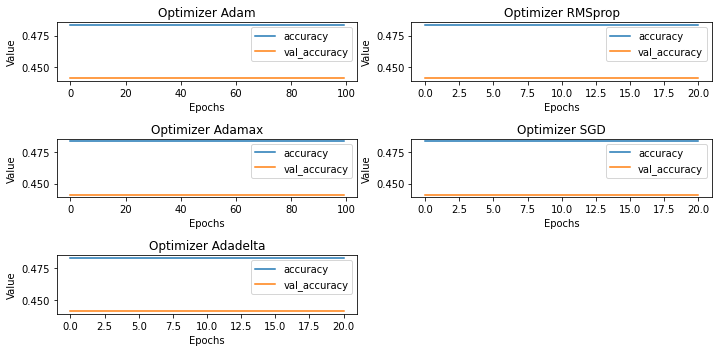

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Optimizer {optimizers_name[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-4: Komparasi Loss Function dengan karakteristik sebagai berikut.
* **Activation Function**: Disesuaikan dengan Adam
* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Learning Rate**: 0.0001
* **Jumlah layer**: sedang

In [ ]:
losses = ["mean_squared_error", "mean_absolute_error", "mean_squared_logarithmic_error", "poisson"]

In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, loss in enumerate(losses):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = loss,
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      callbacks = [early_stopping, model_checkpoint],
      epochs = 100,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 539ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 37ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 34ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 36ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 1.0926 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 524ms/step - loss: 1.0926 - accuracy: 0.4833 - val_loss: 1.2331 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 1.0925 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 36ms/step - loss: 1.0925 - accuracy: 0.4833 - val_loss: 1.2331 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 1.0925 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 39ms/step - loss: 1.0925 - accuracy: 0.4833 - val_loss: 1.2331 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 1.0925 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 35ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 595ms/step - loss: 0.6598 - accuracy: 0.4833 - val_loss: 0.7517 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 39ms/step - loss: 0.6598 - accuracy: 0.4833 - val_loss: 0.7517 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 33ms/step - loss: 0.6598 - accuracy: 0.4833 - val_loss: 0.7517 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 42ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 1.2131 - accuracy: 0.2049
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 546ms/step - loss: 1.2131 - accuracy: 0.2049 - val_loss: 1.4389 - val_accuracy: 0.1912
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 1.2107 - accuracy: 0.2049
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 43ms/step - loss: 1.2107 - accuracy: 0.2049 - val_loss: 1.4353 - val_accuracy: 0.1912
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 1.2083 - accuracy: 0.2027
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 40ms/step - loss: 1.2083 - accuracy: 0.2027 - val_loss: 1.4316 - val_accuracy: 0.1912
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 1.2060 - accuracy: 0.2027
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 33ms/step

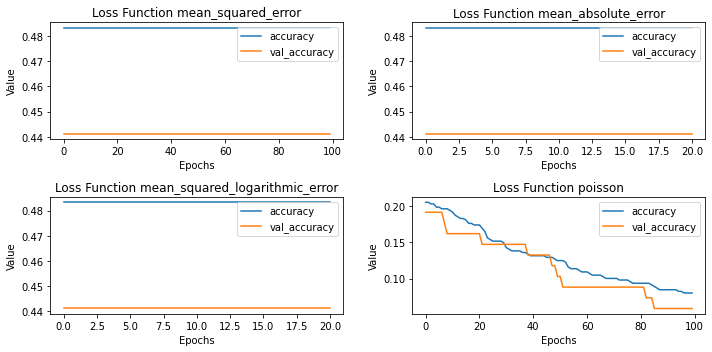

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(2, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Loss Function {losses[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-5: Komparasi Batch Size dengan karakteristik sebagai berikut.

* **Optimizers**: Adam
* **Epoch Size**: 100
* **Loss Function**: mean_squared_error
* **Learning Rate**: 0.0001
* **Jumlah layer**: sedang

In [ ]:
batch_sizes = [10, 100, 200, 300, 400, NUMBER_OF_DATASET_ROWS]

In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, batch_size in enumerate(batch_sizes):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = batch_size,
      callbacks = [early_stopping, model_checkpoint],
      epochs = 200,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


38/45 [========================>.....] - ETA: 0s - loss: 2.6507 - accuracy: 0.4737 
Epoch 1: val_accuracy did not improve from 0.44118
45/45 [==============================] - 1s 5ms/step - loss: 2.7056 - accuracy: 0.4833 - val_loss: 3.2264 - val_accuracy: 0.4412
Epoch 2/200
34/45 [=====================>........] - ETA: 0s - loss: 3.0105 - accuracy: 0.4529
Epoch 2: val_accuracy did not improve from 0.44118
45/45 [==============================] - 0s 3ms/step - loss: 2.6376 - accuracy: 0.4833 - val_loss: 3.1486 - val_accuracy: 0.4412
Epoch 3/200
38/45 [========================>.....] - ETA: 0s - loss: 2.5115 - accuracy: 0.4789
Epoch 3: val_accuracy did not improve from 0.44118
45/45 [==============================] - 0s 2ms/step - loss: 2.5703 - accuracy: 0.4744 - val_loss: 3.0766 - val_accuracy: 0.4265
Epoch 4/200
36/45 [=======================>......] - ETA: 0s - loss: 2.6468 - accuracy: 0.4417
Epoch 4: val_accuracy did not improve from 0.44118
45/45 [==============================] -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/5 [=====>........................] - ETA: 1s - loss: 3.7277 - accuracy: 0.5000
Epoch 1: val_accuracy did not improve from 0.44118
5/5 [==============================] - 1s 43ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 2/200
1/5 [=====>........................] - ETA: 0s - loss: 1.8296 - accuracy: 0.5100
Epoch 2: val_accuracy did not improve from 0.44118
5/5 [==============================] - 0s 8ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 3/200
1/5 [=====>........................] - ETA: 0s - loss: 4.1107 - accuracy: 0.4200
Epoch 3: val_accuracy did not improve from 0.44118
5/5 [==============================] - 0s 8ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 4/200
1/5 [=====>........................] - ETA: 0s - loss: 2.5316 - accuracy: 0.4800
Epoch 4: val_accuracy did not improve from 0.44118
5/5 [==============================] - 0s 9ms/step - l

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/3 [=========>....................] - ETA: 0s - loss: 3.2081 - accuracy: 0.4250
Epoch 1: val_accuracy did not improve from 0.44118
3/3 [==============================] - 1s 82ms/step - loss: 2.5977 - accuracy: 0.4833 - val_loss: 3.1489 - val_accuracy: 0.4412
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 2.5898 - accuracy: 0.4900
Epoch 2: val_accuracy did not improve from 0.44118
3/3 [==============================] - 0s 15ms/step - loss: 2.5912 - accuracy: 0.4833 - val_loss: 3.1418 - val_accuracy: 0.4412
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 2.7452 - accuracy: 0.5400
Epoch 3: val_accuracy did not improve from 0.44118
3/3 [==============================] - 0s 19ms/step - loss: 2.5852 - accuracy: 0.4833 - val_loss: 3.1346 - val_accuracy: 0.4412
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 2.4263 - accuracy: 0.4750
Epoch 4: val_accuracy did not improve from 0.44118
3/3 [==============================] - 0s 16ms/step 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/2 [==============>...............] - ETA: 0s - loss: 3.2064 - accuracy: 0.4567
Epoch 1: val_accuracy did not improve from 0.44118
2/2 [==============================] - 1s 151ms/step - loss: 2.8315 - accuracy: 0.4833 - val_loss: 3.4240 - val_accuracy: 0.4412
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 2.7146 - accuracy: 0.5100
Epoch 2: val_accuracy did not improve from 0.44118
2/2 [==============================] - 0s 28ms/step - loss: 2.8288 - accuracy: 0.4833 - val_loss: 3.4211 - val_accuracy: 0.4412
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 2.6845 - accuracy: 0.4767
Epoch 3: val_accuracy did not improve from 0.44118
2/2 [==============================] - 0s 29ms/step - loss: 2.8262 - accuracy: 0.4833 - val_loss: 3.4181 - val_accuracy: 0.4412
Epoch 4/200
1/2 [==============>...............] - ETA: 0s - loss: 2.7648 - accuracy: 0.4867
Epoch 4: val_accuracy did not improve from 0.44118
2/2 [==============================] - 0s 38ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 3.1252 - accuracy: 0.4900
Epoch 1: val_accuracy did not improve from 0.44118
2/2 [==============================] - 1s 177ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 3.2754 - accuracy: 0.4700
Epoch 2: val_accuracy did not improve from 0.44118
2/2 [==============================] - 0s 52ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 3.0435 - accuracy: 0.4775
Epoch 3: val_accuracy did not improve from 0.44118
2/2 [==============================] - 0s 40ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 4/200
1/2 [==============>...............] - ETA: 0s - loss: 3.2463 - accuracy: 0.4725
Epoch 4: val_accuracy did not improve from 0.44118
2/2 [==============================] - 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 795ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 41ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 48ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 47ms/step

Plot History

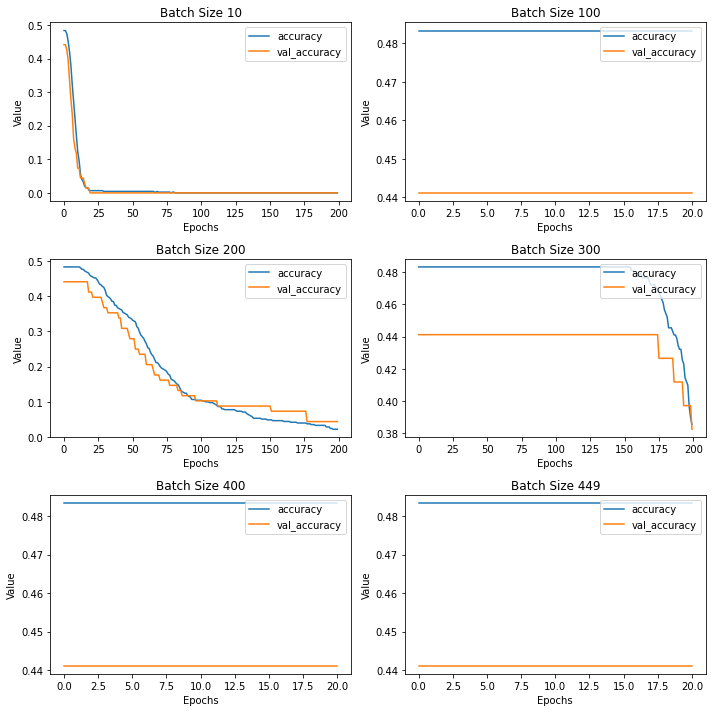

In [ ]:
plt.figure(figsize = (10, 10))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Batch Size {batch_sizes[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-6: Komparasi Epochs dengan karakteristik sebagai berikut.

* **Activation Function**: mean squared error
* **Optimizers**: Adam
* **Batch Size**: Disesuaikan dengan jumlah data
* **Learning Rate**: 0.0001
* **Jumlah layer**: sedang

In [ ]:
epochs = [100, 200, 300, 400]

In [ ]:
histories = []

for index, epoch in enumerate(epochs):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = batch_size,
      callbacks = [early_stopping, model_checkpoint],
      epochs = epoch,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.1018 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 1s/step - loss: 3.1018 - accuracy: 0.4833 - val_loss: 3.7233 - val_accuracy: 0.4412
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.1017 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 80ms/step - loss: 3.1017 - accuracy: 0.4833 - val_loss: 3.7232 - val_accuracy: 0.4412
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.1016 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 118ms/step - loss: 3.1016 - accuracy: 0.4833 - val_loss: 3.7230 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.1015 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 148ms/step 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.0860 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 921ms/step - loss: 3.0860 - accuracy: 0.4833 - val_loss: 3.7025 - val_accuracy: 0.4412
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 3.0856 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 44ms/step - loss: 3.0856 - accuracy: 0.4833 - val_loss: 3.7019 - val_accuracy: 0.4412
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 3.0852 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 56ms/step - loss: 3.0852 - accuracy: 0.4833 - val_loss: 3.7013 - val_accuracy: 0.4412
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 3.0848 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 42ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.0528 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 535ms/step - loss: 3.0528 - accuracy: 0.4833 - val_loss: 3.6320 - val_accuracy: 0.4412
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 3.0518 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 40ms/step - loss: 3.0518 - accuracy: 0.4833 - val_loss: 3.6308 - val_accuracy: 0.4412
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 3.0509 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 33ms/step - loss: 3.0509 - accuracy: 0.4833 - val_loss: 3.6297 - val_accuracy: 0.4412
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 3.0499 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 38ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 1: val_accuracy did not improve from 0.44118
1/1 [==============================] - 1s 597ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 2/400
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 2: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 50ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 3/400
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 3: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 37ms/step - loss: 3.1045 - accuracy: 0.4833 - val_loss: 3.7256 - val_accuracy: 0.4412
Epoch 4/400
1/1 [==============================] - ETA: 0s - loss: 3.1045 - accuracy: 0.4833
Epoch 4: val_accuracy did not improve from 0.44118
1/1 [==============================] - 0s 43ms/step

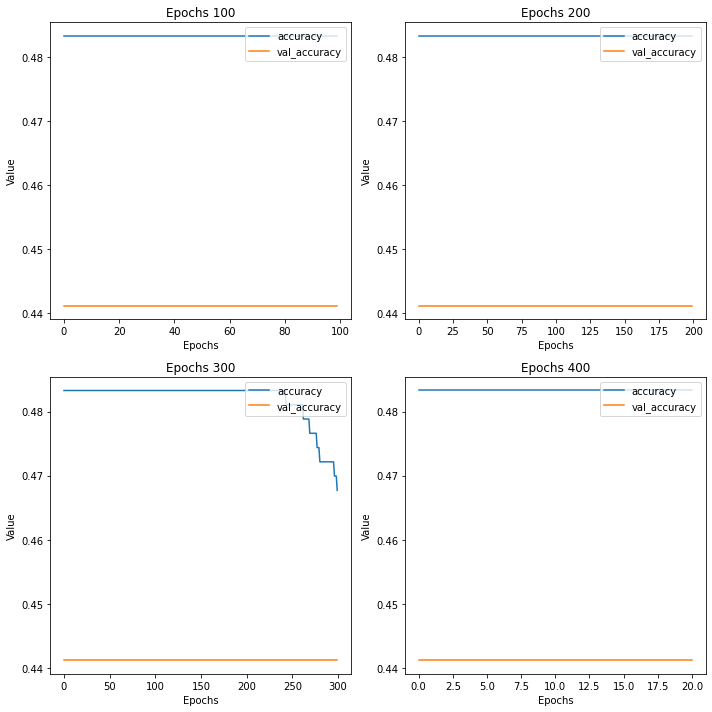

In [ ]:
plt.figure(figsize = (10, 10))

for index, history in enumerate(histories):
  plt.subplot(2, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Epochs {epochs[index]}")

plt.tight_layout()
plt.show()